# Ex06 Red Neuronal Convolucional en TensorFlow

En esta actividad, implementaremos una red neuronal convolucional utilizando TensorFlow para abordar un problema de clasificación. Se asume que ya estas familiarizado con conceptos básicos de TensorFlow como el uso de constantes, variables, tipos de datos, sesiones, placeholders y grafos de cómputo.

Aprendizaje esperados:

- Implementar algunas funciones de utilería que utilizaremos en el modelo ConvNet
- Construir y entrenar una ConvNet en TensorFlow para un problema de clasificación

## Uso de librerías

Para comenzar con la actividad, importemos las librerías que utilizaremos.

In [1]:
#import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from utils import *

%matplotlib inline
np.random.seed(1)

print(tf.version)

<module 'tensorflow_core._api.v2.version' from 'c:\\_devtools\\python\\anaconda3\\envs\\nenvgpujupyter\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


## 1. Exploración del dataset de entrenamiento

En esta actividad, utilizaremos un conjunto de datos que contienen imágenes con señas que representan números del 0 al 5. El conjunto de datos se encuentra organizado en dos archivos: `train_signs.h5` que utilizaremos para entrenamiento y `test_signs.h5` que utilizaremso para realizar las pruebas. Ejecutemos la siguiente celda para cargar los datasets que vamos a utilizar.

In [2]:
# Cargar datos (signs)
# utilicemos la función load_dataset() definida en utils.py

X_train_original, Y_train_original, X_test_original, Y_test_original, classes = load_dataset()

<img src="images/SIGNS.png" style="width:600px;height:250px;">

y = [1]


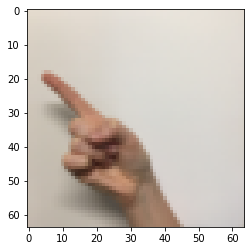

In [3]:
# Veamos una imagen del conjunto de datos de entrenamiento
i = 7
plt.imshow(X_train_original[i])
print (f"y = {Y_train_original[:, i]}")

Ahora que hemos visto el tipo de imágenes que contienen los `dataset`, examinemos las dimensiones de los conjuntos de datos de entrenamiento y prueba.

In [4]:
print (f"Número de ejemplos de entrenamiento: {X_train_original.shape[0]}")
print (f"Número de ejemplos de prueba:  {X_test_original.shape[0]}")
print (f"Dimensiones de X_train_original: {X_train_original.shape}")
print (f"Dimensiones de Y_train_original: {Y_train_original.shape}")
print (f"Dimensiones de X_test_original shape: {X_test_original.shape}")
print (f"Dimensiones de Y_test_original: {Y_test_original.shape}")
print ("Classes: {}".format(classes))

Número de ejemplos de entrenamiento: 1080
Número de ejemplos de prueba:  120
Dimensiones de X_train_original: (1080, 64, 64, 3)
Dimensiones de Y_train_original: (1, 1080)
Dimensiones de X_test_original shape: (120, 64, 64, 3)
Dimensiones de Y_test_original: (1, 120)
Classes: [0 1 2 3 4 5]


Antes de continuar, normalicemos las imágenes y realicemos la conversión de las etiquetas a una representación One hot (para esto podemos utilizar la función one_hot definida en `utils.py`). Verifiquemos las dimensiones de `Y_train` y `Y_test`.

In [5]:
X_train = X_train_original/255.  #Normalicemos las imágenes de entrenamiento
X_test = X_test_original/255.    #Normalicemos las imágenes de pruebas
Y_train = one_hot(Y_train_original, len(classes)).T     #one_hot(dataset, número de clases).T  number of classes is 6
Y_test = one_hot(Y_test_original, len(classes)).T      #one_hot(dataset, número de clases).T number of classes is 6

print (f"Dimensiones de Y_train_original: {Y_train.shape}")
print (f"Dimensiones de Y_test_original: {Y_test.shape}")


Dimensiones de Y_train_original: (1080, 6)
Dimensiones de Y_test_original: (120, 6)


## 2. Modelo en TensorFlow

Antes de construir el modelo, implementemos algunas funciones que utilizaremos posteriormente en el modelo de nuestra ConvNet.

- init_parameters
- forward_propagation
- compute_cost

### 2.1 Funciones base

#### 2.1.1 Creación de los placeholders

TensorFlow 2.X no maneja placeholders entonces no los crearemos para $X$ y la salida esperada $Y$. No debemos definir el número de ejemplos de entrenamiento por el momento. Para hacerlo, puede usar la palabra `None` como el tamaño del lote. Esto le dará la flexibilidad para definirlo más tarde. Así, $X$ debe ser de dimensiones: [None, n_H, n_W, n_C] y $Y$ debe ser de dimensiones [None, n_y].

[Más información](https://www.tensorflow.org/api_docs/python/tf/placeholder).

#### 2.1.2 Inicialización de parámetros

Inicialicemos los filtros: $𝑊1$ y $W2$ utilizando:

In tensorflow 2.0 you have a package tf.initializer with all the Keras-like initializers you need.

The Xavier initializer is the same as the Glorot Uniform initializer. Thus, to create a (3,3) variable with values sampled from that initializer you can just:

shape = (3,3)

initializer = tf.initializers.GlorotUniform([seed = ])

var = tf.Variable(initializer(shape=shape))

. No necesita preocuparse por los `bias`, ya que las funciones de TensorFlow se ocupan del `bias`. Adicionalmente, considere que sólo inicializará los filtros para las funciones `conv2d` (TensorFlow inicializa las capas `FC` automáticamente). Implementemos la función `init_parameters()`. 

Para inicializar un parámetro 𝑊 de dimensiones [1, 2, 3, 4] en TensorFlow, utilice:

```python
W = tf.Variable("W", [1,2,3,4], initializer = ...)
```

[Más información](https://www.tensorflow.org/api_docs/python/tf/get_variable).

Las dimensiones para cada grupo de filtros son:
- W1 : [4, 4, 3, 8]
- W2 : [2, 2, 8, 16]

In [6]:
def init_parameters():
    """
    Inicializar los pesos para construir la red neuornal con TensorFlow.
    
    Retorna:
    parameters --un diccionario de tensores conteniendo W1, W2
    """
    
    tf.random.set_seed(1)                              # para que sus valores aleatorios concuerden
        
    ### INICIA TU CÓDIGO ### 
    #W1 = tf.Variable("W1",[4,4,3,8],initializer = tf.initializers.GlorotUniform(seed = 0) )
    #W2 = tf.Variable("W2", [2, 2, 8, 16], initializer=tf.initializers.GlorotUniform(seed=0))
    initializer = tf.initializers.GlorotUniform(seed = 0)
    W1 = tf.Variable(initializer(shape=[4,4,3,8]))
    W2 = tf.Variable(initializer(shape=[2, 2, 8, 16]))
    ### FIN DE TU CÓDIGO ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [7]:
parameters = init_parameters()

print(f"W1 = {parameters['W1'][1,1,1]}")
print(f"W2 = {parameters['W2'][1,1,1]}")

W1 = [-0.05346771  0.18349849 -0.01215445  0.00138046  0.0012947  -0.02904211
 -0.11260509 -0.143055  ]
W2 = [-0.1713624   0.09527719 -0.0744766  -0.02245569  0.24450928 -0.06879854
  0.21546292 -0.08803296 -0.16513646 -0.19527972 -0.22957063  0.15745944
  0.13090086 -0.12304181 -0.05287278  0.03434092]


#### 2.1.3 Forward propagation

TensorFlow provee un conjuto de funciones para realizar las convoluciones (no es necesario implementarlas desde cero).

- tf.nn.conv2d(X,W, strides = [1,s,s,1], padding = 'SAME')

    - Dada una entrada `X` y un grupo de filtros `W`, la función `conv2` aplica la convolución de `W` sobre `X`. El tercer parámetro `[1, s, s, 1]` representa el `stride` para cada dimensión de la entrada `(m, n_H_prev, n_W_prev, n_C_prev)`. [[documentación]](https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/nn/conv2d)


- tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME')
    - Data una entrada `A`, la función max_pool utiliza una ventana de dimensiones `(f, f)` y `stride` de tamaño `(s, s)` para realizar el `max pooling` sobre cada ventana. [[documentación]](https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/nn/max_pool)
    ksize[channel/s, x, y, outpus]
    
    
- tf.nn.relu(Z)
    - Calcula la función `ReLU` a los elementos de `Z` (puede tener cualquier forma). [[documentación]](https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/nn/relu)


- tf.contrib.layers.flatten(A)
    - Dada una entrada A, esta función aplana cada ejemplo en un vector 1D mientras mantiene el tamaño del lote. Devuelve un tensor aplanado con forma `[batch_size, k]`. [[documentación]](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/flatten)


- tf.contrib.layers.fully_connected(F, num_outputs)
    - Dada una entrada aplanada F, devuelve la salida calculada usando una capa completamente conectada. [[documentación]](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/fully_connected)

$\textbf{Nota}$: La función `tf.contrib.layers.fully_connected`, inicializa automáticamente los pesos en el grafo y continúa entrenándolos durante el entrenamiento del modelo. Por lo tanto, no necesita inicializar esos pesos al inicializar los parámetros.

Utilizando las funciones descritas anteriormente, implementemos la función `forward_propagation`  para construir el siguiente modelo: 


`CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED`


Para este ejercicio, utilicemos los siguientes parámetros:

- $\textbf{CONV2D}$: stride=1, padding="SAME"

- $\textbf{RELU}$

- $\textbf{MAXPOOL}$: filtro de 8x8, stride = 8, padding = "SAME"

- $\textbf{CONV2D}$: stride=1, padding = "SAME"

- $\textbf{RELU}$

- $\textbf{MAXPOOL}$: filtro de 4x4, stride = 4, padding = "SAME"

- $\textbf{FLATTEN}$

- $\textbf{FULLYCONNECTED (FC) layer}$.

$\text{Nota}$: la capa FC dará como resultado 6 neuronas en la capa de salida, que luego pasarán a un función `softmax`. En TensorFlow, las funciones `softmax` y `cost` se agrupan en una sola función, que se invocará posteriormente al calcular el costo.

In [10]:
def forward_propagation(X, parameters, nClasses):
    """
    Implementación de forward propagation para el modelo:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Parámetros:
    X             placeholder del dataset de entrada, de dimensiones (input size, number of examples)
    parameters    diccionario de python que contiene los parámetros W1, W2
                  recordemos que las dimensiones se definen en la inicialización de parámetros.

    Retorna:
    Z3            la salida de la última unidad lineal
    """
    
    # Recupera los parámetros del diccionario "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    ### INICIA TU CÓDIGO ###
    
    # CONV2D: filtros = W1, stride = 1, padding = 'SAME'
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1] , padding = 'SAME')
    
    # RELU
    A1 = tf.nn.relu(Z1)
    
    # MAXPOOL: filtro = 8x8, stride = 8, padding = 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    
    # CONV2D: filtros = W2, stride=1, padding='SAME'
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    
    # RELU
    A2 = tf.nn.relu(Z2)
    
    # MAXPOOL: filtro = 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    
    # Capa FC con "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2 , nClasses, activation_fn=None )
    
    ### FIN DE TU CODIGO ###

    return Z3

In [11]:
np.random.seed(1)
#X, Y = create_placeholder(64, 64, 3, 6)
parameters = init_parameters()
X = tf.constant(np.random.randn(2,64,64,3), tf.float32)
Z3 = forward_propagation(X, parameters, len(classes))
#a = session.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
print("Z3 = " + Z3)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above. [Op:Conv2D]

#### 2.1.4 Calcular de costo

Implementemos el cálculo de la función de costo. Para esto, utilizaremos las siguiente funciones que proporciona TensorFlow y que nos permiten evitar una implementació desde cero.
 
- tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y)
    - Esta función calcula la función de activación softmax y la pérdida resultante.  [[Documentación]](https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/nn/softmax_cross_entropy_with_logits)


- tf.reduce_mean
    - Calcula la media de elementos a través de las dimensiones de un tensor. Utilice esta función para sumar las pérdidas sobre todos los ejemplos y así obtener el costo total. [[Documentación]](https://www.tensorflow.org/versions/r1.14/api_docs/python/tf/math/reduce_mean)


In [ ]:
def cost_function(Z, Y):
    """
    Calcular el costo
    
    Parámetros:
    Z     salida del forward propagation (salida de la última unidad de activación lineal), de dimensiones (6, numero de ejemplos)
    Y     placeholder de vector con etiquetas reales, tiene la misma dimensión que Z
    
    Retorna:
    cost Tensor del costo
    """
    
    ### INICIO DE TU CÓDIGO ###
    clogs = None
    cost = None
    ### FIN DE TU CÓDIGO ###
    
    return cost

In [ ]:
tf.reset_default_graph()

with tf.Session() as session:
    np.random.seed(1)
    X, Y = create_placeholder(64, 64, 3, 6)
    parameters = init_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = cost_function(Z3, Y)
    init = tf.global_variables_initializer()
    session.run(init)
    a = session.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

### 2.2 Integración del modelo ConvNet

Finalmente, integremos las funciones que implementamos anteriormente para construir un modelo. Posteriormente, entrenaremos el conjunto de datos `train_signs.h5` utilizando mini lotes. En el archivo `utils.py` se encuentra implementada la función `random_mini_batches()`. Recuerde que esta función devuelve una lista de mini lotes.

El modelo debería:

- Crear placeholders
- Inicializar parámetros
- Realizar el forward propagation
- Calcular el costo
- Crear un optimizador

Finalmente, creará una sesión y ejecutará un bucle for para num_epochs, obtendrá los mini lotes y luego, para cada mini lote, optimizará la función. [[doc para inicialización las variables]](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer)

Completemos la siguiente función:

In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.006, num_epochs = 100, minibatch_size = 64):
    """
    Recordemos la estructura de la ConvNet:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Parámetros: 
    X_train          dataset de entrenamiento, dimensiones (None, 64, 64, 3)
    Y_train          etiquetas reales del dataset de entrenamiento, dimensiones (None, n_y = 6)
    X_test           dataset de pruebas, dimensiones (None, 64, 64, 3)
    Y_test           etiquetas reales del dataset de pruebas, dimensiones (None, n_y = 6)
    learning_rate    tasa de aprendizaje del optimizador
    num_epochs       número de epocas del ciclo del optimizador
    minibatch_size   tamaño del mini batch 
    """
    
    ops.reset_default_graph()                   # permite ejecutar el modelo sin sobre escribir las variables tf
    tf.set_random_seed(1)                       # para mantener los resultados consistentes tensorflow
    seed = 3                                    # para mantener los resultados consistentes en numpy 
    
    (m, n_H0, n_W0, n_C0) = None       # identificar las dimensiones del dataset de entrenamiento
    n_y = None                      # identificar el número de etiquetas
    costs = []                                  # Para mantener un registro de los costos
    
    # Crear placeholders con las dimensiones correctas
    ### INICIA TU CÓDIGO ### 
    X, Y = None
    ### FINALIZA TU CÓDIGO ###

    # Inicializar los parámetros
    ### INICIA TU CÓDIGO ### (1 line)
    parameters = None
    ### FINALIZA TU CÓDIGO ###
    
    # Forward propagation: crear el forward propagation en el grafo de cómputo de TensorFlow
    ### INICIA TU CÓDIGO ### (1 line)
    Z3 = None
    ### FINALIZA TU CÓDIGO ###
    
    # Función de costo: agrega la función de costo al grafo de cómputo
    ### INICIA TU CÓDIGO ### (1 line)
    cost = None
    ### FINALIZA TU CÓDIGO ###
    
    # Backpropagation: definir el optimizador en TensorFlow. Utilicemos un optimizador AdamOptimizer
    # para minimizar el costo
    
    ### INICIA TU CÓDIGO ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### FINALIZA TU CÓDIGO ###
    
    # Inicializar globalmente todas las variables
    init = None
     
    # Iniciar la sesión para evaluar el grafo de TensorFlow
    with tf.Session() as session:
        
        # Ejecutar la inicialización
        session.run(None)
        
        # Ciclo de entrenamiento
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed) #Definida en utils.py

            for minibatch in minibatches:
                # Selecciona un minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: Ejecución del grafo sobre un minibatch.
                # Ejecutar la sesión para ejecutar el optimizador y la función de costo, t
                # el feed_dict debe contener un minibatch (X,Y).
                ### INICIA TU CÓDIGO ### 
                _ , temp_cost = session.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                ### FINALIZA TU CÓDIGO ###
                
                minibatch_cost += temp_cost / num_minibatches
                
            # Imprimir el costo
            if epoch % 10 == 0:
                print (f"Costo despues de la epoca {epoch}: {None}")
            if epoch % 1 == 0:
                costs.append(None)
        
        
        # graficar el costo
        plt.plot(np.squeeze(costs))
        plt.ylabel('Costo')
        plt.xlabel('Epocas')
        plt.title("Tasa de aprendizaje:" + str(None))
        plt.show()

        # Calcular las predicciones correctas
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calcular la exactitud sobre el conjunto de pruebas
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Exactitud (Training dataset):", train_accuracy)
        print("Exactitud (Test datset):", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

In [ ]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)